## Examine the Dataset

In [54]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns
from scipy import stats
import datetime as dt

In [55]:
# Read the File
# df = pd.read_csv('yellow_tripdata_2016-01.csv')
#df = pd.read_parquet('yellow_tripdata_2016-03.parquet')
#df.to_csv('tripdata.csv')

In [56]:
df = pd.read_csv('yellow_tripdata_2009-01.csv')
df.head()

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,NaN,NaN,-73.993803,40.695922,CASH,8.9,0.5,NaN,0.00,0.0,9.40
1,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.55,-73.982102,40.736290,NaN,NaN,-73.955850,40.768030,Credit,12.1,0.5,NaN,2.00,0.0,14.60
2,VTS,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587,40.739748,NaN,NaN,-73.869983,40.770225,Credit,23.7,0.0,NaN,4.74,0.0,28.44
3,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5.00,-73.974267,40.790955,NaN,NaN,-73.996558,40.731849,CREDIT,14.9,0.5,NaN,3.05,0.0,18.45
4,DDS,2009-01-24 16:18:23,2009-01-24 16:24:56,1,0.40,-74.001580,40.719382,NaN,NaN,-74.008378,40.720350,CASH,3.7,0.0,NaN,0.00,0.0,3.70


In [57]:
df.columns

Index(['vendor_name', 'Trip_Pickup_DateTime', 'Trip_Dropoff_DateTime',
       'Passenger_Count', 'Trip_Distance', 'Start_Lon', 'Start_Lat',
       'Rate_Code', 'store_and_forward', 'End_Lon', 'End_Lat', 'Payment_Type',
       'Fare_Amt', 'surcharge', 'mta_tax', 'Tip_Amt', 'Tolls_Amt',
       'Total_Amt'],
      dtype='object')

In [58]:
# see description of dataset
# df.describe

In [59]:
df.dropna(subset=['Trip_Pickup_DateTime','Trip_Dropoff_DateTime','Trip_Distance'],inplace=True)

In [60]:
print("Length of Dataframe (number of rows): ", len(df))

Length of Dataframe (number of rows):  14092413


## Explanations of the attributes:
- vendorID: is NOT the cab company, is the provider that provided the DATA
- pickupTime: timestamp of start of taxi ride (Type: yyyy-mm-dd hh:mm:ss)
- dropoffTime: timestamp of end of taxi ride
- passenger_count: how many passengers did the taxi carry
- trip_distance: how far was the trip distance in miles
- pickup_longitude: Longitude of the Pickup Coordinate
- pickup_latitude: Latitude of the Pickup Coordinate
- RatecodeID: some taxi specific stuff
- store_and_fwd_flag: whether trip record was held in vehicle memory before sending to vendor
- dropoff_longitude: longitude of the dropoff coordinate
- dropoff_latitude: latitude of the dropoff coordinate
- payment type: 1 = credit card, 2 = cash, 3 = no charge, 4 = dispute, 5 = unknown, 6 = voided trip
- fare amount: time-and-distance fare
- extra: miscellaneous extras and surcharges (for rush hour and overnight)
- mta_tax: depends on specific taxi rate
- tip_amount: credit card tips (! cash tips not included)
- tolls_amount: tolls paid on trip
- improvement_surcharge: some specific taxi stuff
- total_amount: amount charged to passengers (! cash tips not included)

In [61]:
# check for missing values
df.isnull().sum()

vendor_name                     0
Trip_Pickup_DateTime            0
Trip_Dropoff_DateTime           0
Passenger_Count                 0
Trip_Distance                   0
Start_Lon                       0
Start_Lat                       0
Rate_Code                14092413
store_and_forward        14091189
End_Lon                         0
End_Lat                         0
Payment_Type                    0
Fare_Amt                        0
surcharge                       0
mta_tax                  14092413
Tip_Amt                         0
Tolls_Amt                       0
Total_Amt                       0
dtype: int64

=> no missing relevant values in the dataset

In [62]:
# check for attribute data types
df.dtypes

vendor_name               object
Trip_Pickup_DateTime      object
Trip_Dropoff_DateTime     object
Passenger_Count            int64
Trip_Distance            float64
Start_Lon                float64
Start_Lat                float64
Rate_Code                float64
store_and_forward        float64
End_Lon                  float64
End_Lat                  float64
Payment_Type              object
Fare_Amt                 float64
surcharge                float64
mta_tax                  float64
Tip_Amt                  float64
Tolls_Amt                float64
Total_Amt                float64
dtype: object

## Filtering out Attributes
Necessary attributes:
- pickup and dropoff time
- latitude and longitude for both pickup and dropoff
- passenger_count
- fare amount, tip_amount, total_amount
- trip_distance

In [63]:
# drop unncessary attributes
df.drop(["vendor_name","Rate_Code","store_and_forward","Payment_Type","Fare_Amt","surcharge","mta_tax","Tolls_Amt"],axis=1,inplace=True)

In [64]:
# rename attributes
df.rename(columns={'Trip_Pickup_DateTime':'pickup_time','Trip_Dropoff_DateTime':'dropoff_time','Passenger_Count': 'passenger_count','Trip_Distance': 'trip_distance'},inplace=True)
df.rename(columns = {'Start_Lon': 'pickup_longitude', 'Start_Lat': 'pickup_latitude', 'End_Lon': 'dropoff_longitude', 'End_Lat': 'dropoff_latitude', 'Tip_Amt': 'tip_amount','Total_Amt':'total_amount'},inplace=True)

In [65]:
df.head()

,pickup_time,dropoff_time,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,tip_amount,total_amount
0,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,-73.993803,40.695922,0.00,9.40
1,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.55,-73.982102,40.736290,-73.955850,40.768030,2.00,14.60
2,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587,40.739748,-73.869983,40.770225,4.74,28.44
3,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5.00,-73.974267,40.790955,-73.996558,40.731849,3.05,18.45
4,2009-01-24 16:18:23,2009-01-24 16:24:56,1,0.40,-74.001580,40.719382,-74.008378,40.720350,0.00,3.70


# Filter out wrong entries

In [66]:
# when pickup time and dropoff time is the same -> remove the line
df.drop(df[df['pickup_time']==df['dropoff_time']].index,inplace=True)

In [67]:
# when distance is 0 -> remove the line
df.drop(df[df['trip_distance']==0.0].index,inplace=True)

In [68]:
# remove rows with coordinates outside of New York City

# New York City boundaries: everything with lat and lon in these arrays is within NYC
limits_longitude = np.array([-74.266649,-73.689083])
limits_latitude = np.array([40.493974,40.925023])

# remove all coordinates outside the limits
df = df[(df['pickup_longitude'] >= limits_longitude[0]) & (df['pickup_longitude'] < limits_longitude[1])
& (df['dropoff_longitude'] >= limits_longitude[0]) & (df['dropoff_longitude'] < limits_longitude[1])
& (df['pickup_latitude'] >= limits_latitude[0]) & (df['pickup_latitude'] < limits_latitude[1])
& (df['dropoff_latitude'] >= limits_latitude[0]) & (df['dropoff_latitude'] < limits_latitude[1])]

df = df.reset_index(drop=True)


In [69]:
# check the number of lines again
print("Length of Dataframe (number of rows): ", len(df))

Length of Dataframe (number of rows):  13665596


## Feature Engineering
- create features for searching for patterns:
    - day of week: 1 to 7 for Monday to Sunday
    - weekend: 1 for on weekend or 0 for not on weekend
    - hour: 1 for rush hour (6:00 - 9:00, 16:00 - 19:00), 0 for normal day (9:01 - 15:59, 19:00 - 21:00) or 2 for night (21:00 - 6:00)

In [70]:
# convert to datetime
df['pickup_time'] = pd.to_datetime(df.pickup_time)
df['dropoff_time'] = pd.to_datetime(df.dropoff_time)

### Initial analysis and visualization before feature engineering

In [71]:
# look at the trip duration
# create new column for trip_duration in minutes
df['trip_duration'] = (df['dropoff_time']-df['pickup_time']).dt.total_seconds()/60

In [72]:
df.head()

,pickup_time,dropoff_time,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,tip_amount,total_amount,trip_duration
0,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,-73.993803,40.695922,0.00,9.40,10.000000
1,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.55,-73.982102,40.736290,-73.955850,40.768030,2.00,14.60,7.000000
2,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587,40.739748,-73.869983,40.770225,4.74,28.44,14.000000
3,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5.00,-73.974267,40.790955,-73.996558,40.731849,3.05,18.45,21.033333
4,2009-01-24 16:18:23,2009-01-24 16:24:56,1,0.40,-74.001580,40.719382,-74.008378,40.720350,0.00,3.70,6.550000


C:\Users\koumi\Desktop\NTNU\taxi\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\koumi\Desktop\NTNU\taxi\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


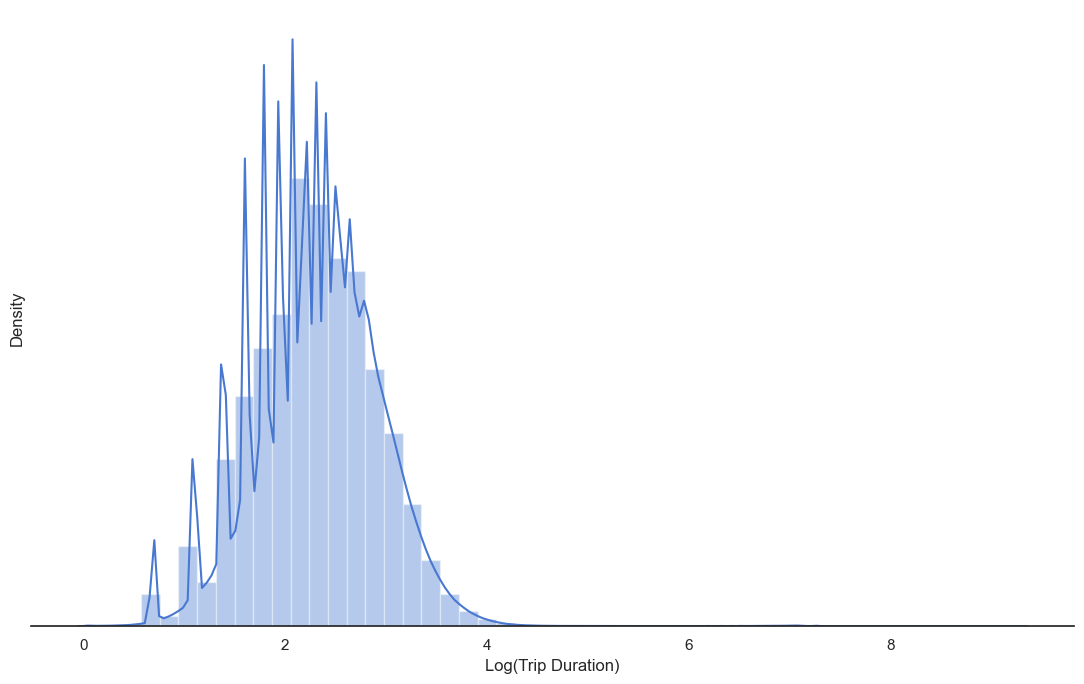

In [73]:
# plot the distribution of the trip duration
sns.set(style="white",palette="muted",color_codes=True)
fig, axes = plt.subplots(1,1,figsize=(11,7),sharex=True)
sns.despine(left=True)
sns.distplot(np.log(df['trip_duration'].values+1),axlabel= 'Log(Trip Duration)',label = 'Log(Trip Duration)', bins = 50, color="b")
plt.setp(axes,yticks=[])
plt.tight_layout()
plt.show()

RESULTS:
- Gaussian Distribution?
- most have e^2.2 trip duration
- longest trip duration around e^4.5

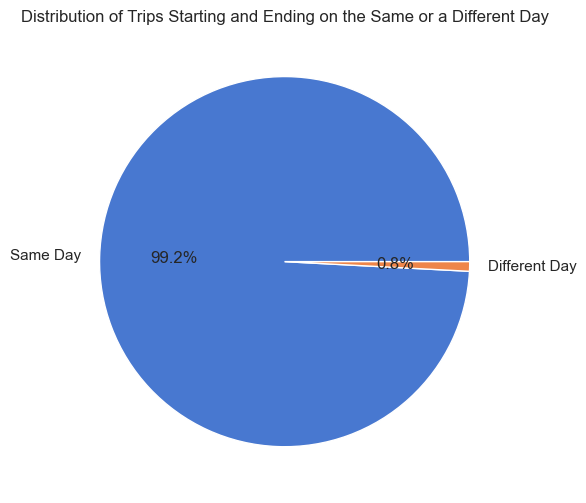

In [74]:
# look at the percentage of trips starting and ending on the same day
# create new column (0 means not starting and ending on the same day, 1 means same day)
df['same_day'] = np.zeros(len(df))
df.loc[df['pickup_time'].dt.day_of_year == df['dropoff_time'].dt.day_of_year, 'same_day'] = 1
# visualize the percentage in pie chart
y = df['same_day'].value_counts()

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(y, labels=["Same Day", "Different Day"],autopct = '%.1f%%')
ax.set_title("Distribution of Trips Starting and Ending on the Same or a Different Day")
plt.tight_layout()


RESULTS:
- 99% of trips start and end on the same day
- 1% of trip start on one day and end on another day

### Create Features

In [75]:
# create feature for hour
df.loc[:, 'pickup_hour'] = df['pickup_time'].dt.hour
df.loc[:, 'dropoff_hour'] = df['dropoff_time'].dt.hour

# create feature for day of week
# Note: for the day we only use the pickup day, because 99% trips start and end on the same day
df.loc[:, 'day_of_week'] = df['pickup_time'].dt.dayofweek

# create feature for weekend (0 means weekday, 1 means weekend)
df['weekend'] = np.zeros(len(df))
df.loc[df['day_of_week'] >= 5, 'weekend'] = 1

# create feature for speed of the trip
df['speed'] = round(df['trip_distance']/(df['trip_duration']),2)

# create feature for 'time of day' (0 is normal day time, 1 is rush hour, 2 is night)
df['time_of_day'] = np.zeros(len(df))
# for rush hour
df.loc[((df.weekend==0) & (((df.pickup_hour>=6) & (df.pickup_hour<9)) | ((df.pickup_hour>=16) & (df.pickup_hour<20)))), 'time_of_day'] = 1
# for night
df.loc[(df['pickup_hour']>=21) | (df['pickup_hour']<6), 'time_of_day'] = 2
# the rest is normal day time --> leave the zeros in the column

### Visualize some more

In [76]:
# trip duration and trip distance and rate per day of week
"""
week = pd.DataFrame(df.groupby(['day_of_week'])['trip_duration','trip_distance','speed'].mean())
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.4
week.trip_duration.plot(kind='bar',color='red',ax=ax,width=width,position=1)
week.trip_distance.plot(kind='bar',color='blue',ax=ax2,width=width,position=0)
ax.set_ylabel('Duration [Minutes]')
ax2.set_ylabel('Distance [Miles]')
plt.xlabel("Day of Week")
plt.title(label="Trip Duration and Distance per Day of Week",fontsize=25)
# plot it
fig = plt.subplots(figsize=(12,8))
# set width of bar
barWidth = round(1/7,2)
# set height of bar
duration = week['trip_duration']
dist = week['trip_distance']
speed = week['speed']
# set position of bar on X axis
bar1 = np.arange(len(duration))
bar2 = [x + barWidth for x in bar1]
bar3 = [x + barWidth for x in bar2]
# make the plot
plt.bar(bar1,duration,color='r',width=barWidth,edgecolor='grey',label='Duration')
plt.bar(bar2,dist,color='g',width=barWidth,edgecolor='grey',label='Distance')
plt.bar(bar3,speed,color='b',width=barWidth,edgecolor='grey',label='Speed')
# Adding X-Ticks
plt.xlabel('Day of Week', fontweight='bold',fontsize=15)
plt.xticks([r + barWidth for r in range(len(duration))],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
# Layout
plt.legend()
plt.show()
"""

'\nweek = pd.DataFrame(df.groupby([\'day_of_week\'])[\'trip_duration\',\'trip_distance\',\'speed\'].mean())\nfig = plt.figure()\nax = fig.add_subplot(111)\nax2 = ax.twinx()\nwidth = 0.4\nweek.trip_duration.plot(kind=\'bar\',color=\'red\',ax=ax,width=width,position=1)\nweek.trip_distance.plot(kind=\'bar\',color=\'blue\',ax=ax2,width=width,position=0)\nax.set_ylabel(\'Duration [Minutes]\')\nax2.set_ylabel(\'Distance [Miles]\')\nplt.xlabel("Day of Week")\nplt.title(label="Trip Duration and Distance per Day of Week",fontsize=25)\n# plot it\nfig = plt.subplots(figsize=(12,8))\n# set width of bar\nbarWidth = round(1/7,2)\n# set height of bar\nduration = week[\'trip_duration\']\ndist = week[\'trip_distance\']\nspeed = week[\'speed\']\n# set position of bar on X axis\nbar1 = np.arange(len(duration))\nbar2 = [x + barWidth for x in bar1]\nbar3 = [x + barWidth for x in bar2]\n# make the plot\nplt.bar(bar1,duration,color=\'r\',width=barWidth,edgecolor=\'grey\',label=\'Duration\')\nplt.bar(bar2,dis

C:\Users\koumi\Desktop\NTNU\taxi\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\koumi\Desktop\NTNU\taxi\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\koumi\Desktop\NTNU\taxi\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


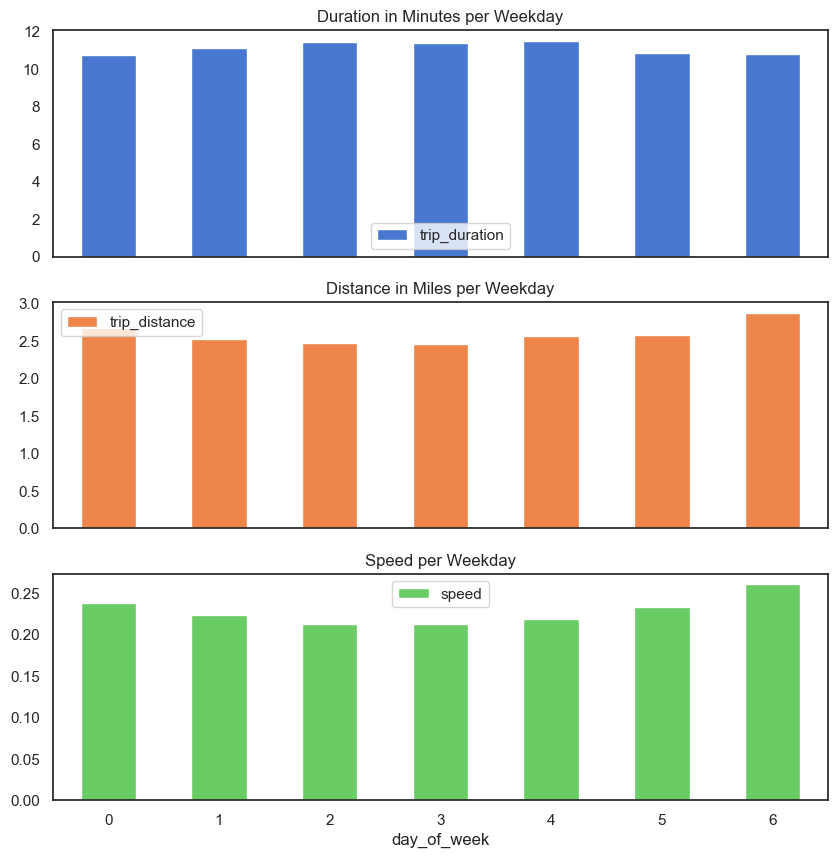

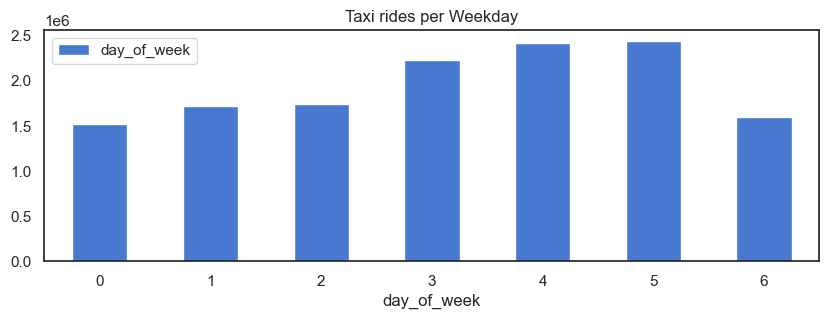

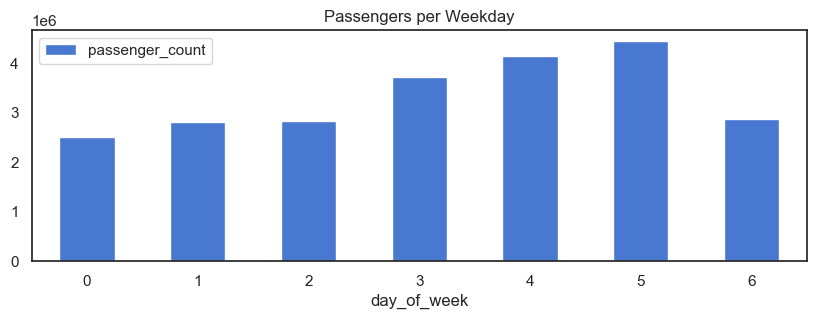

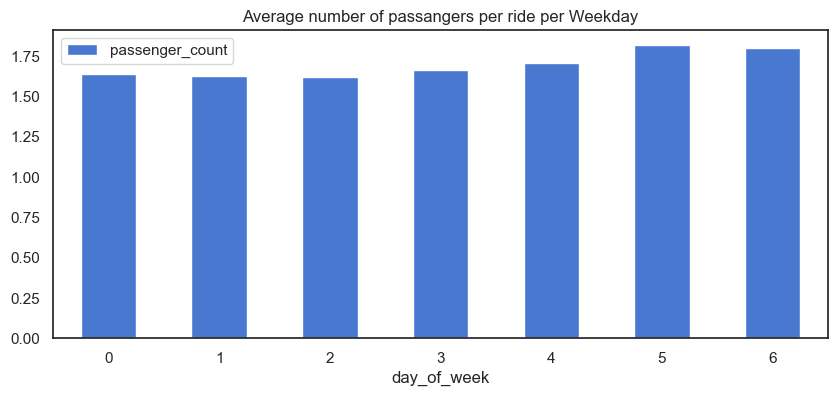

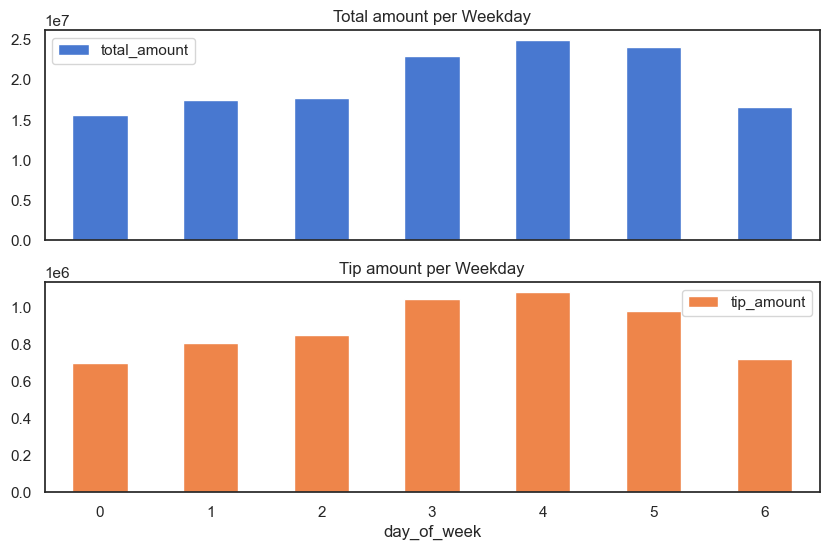

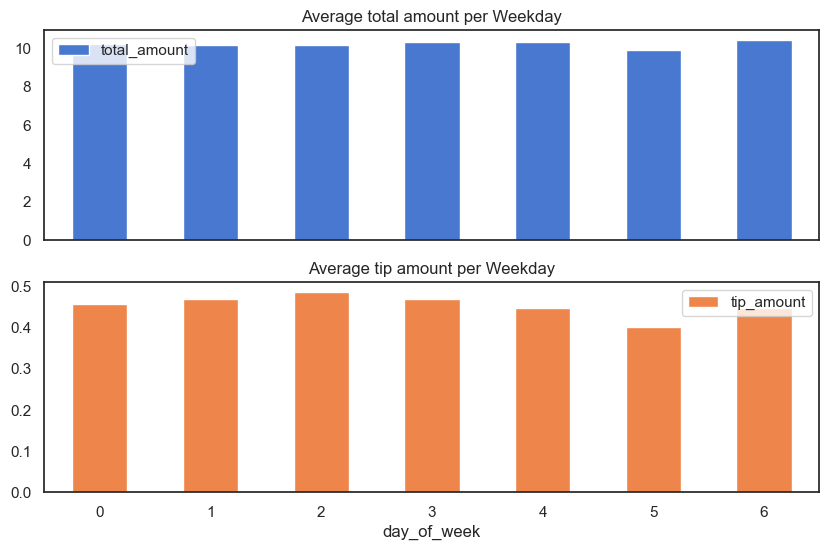

In [77]:
# trip duration and trip distance and rate per day of week
week = pd.DataFrame(df.groupby(['day_of_week'])['trip_duration','trip_distance','speed'].mean())
axes = week.plot.bar(figsize=(10,10),rot=0,subplots=True,title=['Duration in Minutes per Weekday','Distance in Miles per Weekday','Speed per Weekday'])
axes[1].legend(loc=2)

# number of taxi rides during a week
week = pd.DataFrame(df.groupby(['day_of_week'])['day_of_week'].count())
axes = week.plot.bar(figsize=(10,3),rot=0,subplots=True,title=['Taxi rides per Weekday'])
axes[0].legend(loc=2)

# number of passengers during a week
week = pd.DataFrame(df.groupby(['day_of_week'])['passenger_count'].sum())
axes = week.plot.bar(figsize=(10,3),rot=0,subplots=True,title=['Passengers per Weekday'])
axes[0].legend(loc=2)

# average number of passangers per ride per day
week = pd.DataFrame(df.groupby(['day_of_week'])['passenger_count'].mean())
axes = week.plot.bar(figsize=(10,4),rot=0,subplots=True,title=['Average number of passangers per ride per Weekday'])
axes[0].legend(loc=2)

# total amount per weekday, tip amount per weekday
week = pd.DataFrame(df.groupby(['day_of_week'])['total_amount', 'tip_amount'].sum())
axes = week.plot.bar(figsize=(10,6),rot=0,subplots=True,title=['Total amount per Weekday', 'Tip amount per Weekday'])
axes[0].legend(loc=2)

# average total amount per weekday
week = pd.DataFrame(df.groupby(['day_of_week'])['total_amount', 'tip_amount'].mean())
axes = week.plot.bar(figsize=(10,6),rot=0,subplots=True,title=['Average total amount per Weekday', 'Average tip amount per Weekday'])
axes[0].legend(loc=2)

RESULTS for the Day of Week (i.e., Monday until Sunday):
- durations are fairly similar between 14 and 17 miles on average
- distances differ largely though!
- longest distances on Monday followed by Thursday
- BUT highest speed on Tuesday
- fairly similar speed on average for Monday, Wednesday, Friday and the weekend
- slightly higher speed on Thursday
- the highest number of taxi trips is being made on Saturday and Friday, closely followed by Thursday
- the highest number of passengers is travelling on Saturday, followed by Friday and Thursday
- on the weekend trips have more passengers per ride on average
- total amount is the highest on Friday, then Saturday and Thursday
- tip amount is the highest on Friday, then Thursday and Saturday
- average total amount remains roughly the same except of Saturday when is the lowest
- average tip amount is the highest on Wednesday and surprisingly the lowest on Saturday followed by Friday

C:\Users\koumi\Desktop\NTNU\taxi\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


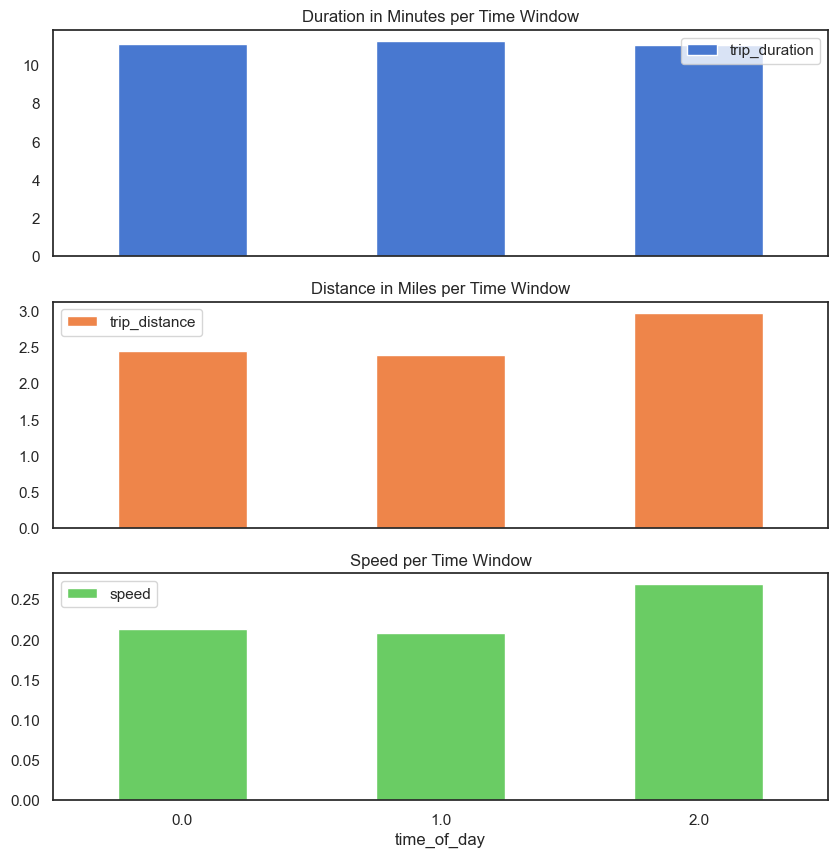

In [78]:
# trip duration and trip distance and rate per times of day
day = pd.DataFrame(df.groupby(['time_of_day'])['trip_duration','trip_distance','speed'].mean())
axes = day.plot.bar(figsize=(10,10),rot=0,subplots=True,title=['Duration in Minutes per Time Window','Distance in Miles per Time Window','Speed per Time Window'])
axes[1].legend(loc=2)

RESULTS for the time of day (0 - normal day time, 1 - rush hour, 2 - night):
- trip durations fairly similar during the time windows
- trip distance longest during normal day time
- speed highest during night and lowest during rush hour!

C:\Users\koumi\Desktop\NTNU\taxi\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


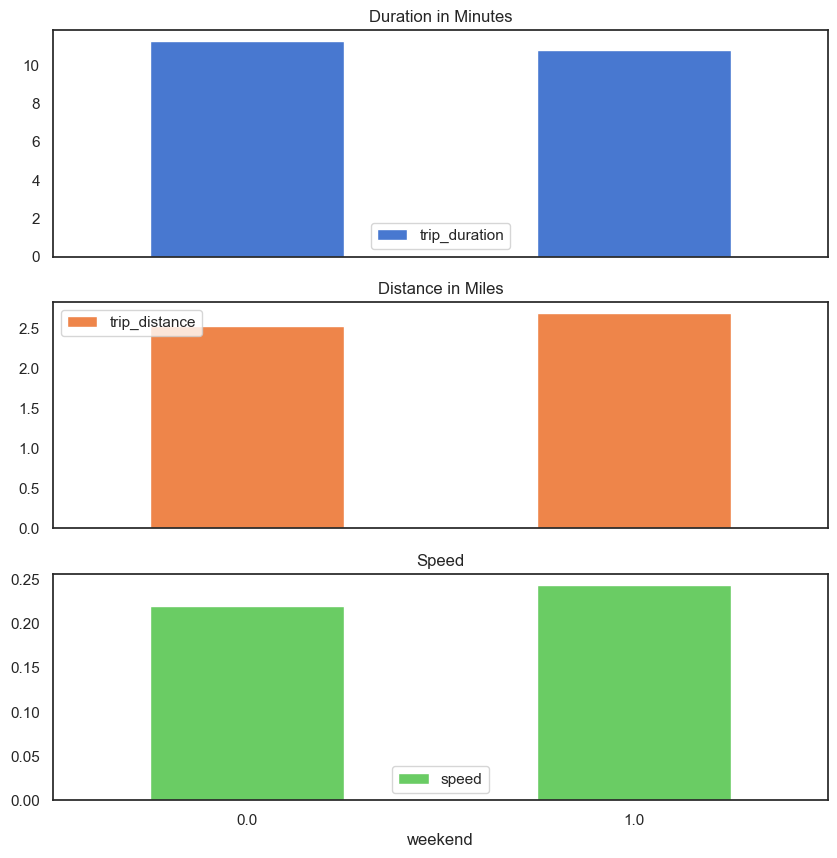

In [79]:
# trip duration and trip distance and rate weekend vs. weekday
weekend = pd.DataFrame(df.groupby(['weekend'])['trip_duration','trip_distance','speed'].mean())
axes = weekend.plot.bar(figsize=(10,10),rot=0,subplots=True,title=['Duration in Minutes','Distance in Miles','Speed'])
axes[1].legend(loc=2)

RESULTS for 0 - weekday vs. 1 - weekend:
- trip duration fairly similar
- trip distance higher from Mon to Fri
- speed higher from Mon to Fri

In [80]:
# display the dataframe
print("The Dataframe has ", len(df), " rows.")

print("DataFrame Content: ")
print(df.head())

The Dataframe has  13665596  rows.
DataFrame Content: 
          pickup_time        dropoff_time  passenger_count  trip_distance  \
0 2009-01-04 02:52:00 2009-01-04 03:02:00                1           2.63   
1 2009-01-04 03:31:00 2009-01-04 03:38:00                3           4.55   
2 2009-01-03 15:43:00 2009-01-03 15:57:00                5          10.35   
3 2009-01-01 20:52:58 2009-01-01 21:14:00                1           5.00   
4 2009-01-24 16:18:23 2009-01-24 16:24:56                1           0.40   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.991957        40.721567         -73.993803         40.695922   
1        -73.982102        40.736290         -73.955850         40.768030   
2        -74.002587        40.739748         -73.869983         40.770225   
3        -73.974267        40.790955         -73.996558         40.731849   
4        -74.001580        40.719382         -74.008378         40.720350   

   tip_amount  tota

# Export Dataframe into File for further work

In [81]:
df.to_csv('tripdata_01.csv')

KeyboardInterrupt: 